# Proyek Analisis Data: Analisa Kualitas Udara dari 12 Titik Pemantauan
- Nama: Margaretha Evelin Lodo
- Email: luckelis32@gmail.com
- ID Dicoding: margaretha_e_l

## Menentukan Pertanyaan Bisnis
- Pertanyaan 1: Bagaimana variasi tingkat kualitas udara di 12 titik pemantauan?
- Pertanyaan 2: Tren apa yang dapat diamati dalam kualitas udara dari waktu ke waktu?


## Import Semua Packages/Library yang Digunakan

In [14]:


import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")


## Data Wrangling

### Gathering Data

In [15]:
from pathlib import Path

# File paths
file_paths = [
    './data/PRSA_Data_Aotizhongxin_20130301-20170228.csv',
    './data/PRSA_Data_Changping_20130301-20170228.csv',
    './data/PRSA_Data_Dingling_20130301-20170228.csv',
    './data/PRSA_Data_Dongsi_20130301-20170228.csv',
    './data/PRSA_Data_Guanyuan_20130301-20170228.csv',
    './data/PRSA_Data_Gucheng_20130301-20170228.csv',
    './data/PRSA_Data_Huairou_20130301-20170228.csv',
    './data/PRSA_Data_Nongzhanguan_20130301-20170228.csv',
    './data/PRSA_Data_Shunyi_20130301-20170228.csv',
    './data/PRSA_Data_Tiantan_20130301-20170228.csv',
    './data/PRSA_Data_Wanliu_20130301-20170228.csv',
    './data/PRSA_Data_Wanshouxigong_20130301-20170228.csv'
]

# Create a list to hold dataframes
dfs = []
for path in file_paths:
    try:
        df = pd.read_csv(path)
        dfs.append(df)
        print(f"✅ Berhasil load: {Path(path).name}")
    except Exception as e:
        print(f"❌ Gagal load {Path(path).name}: {str(e)}")

raw_df = pd.concat(dfs, ignore_index=True)

# Tampilkan 3 baris pertama
raw_df.head(3)



✅ Berhasil load: PRSA_Data_Aotizhongxin_20130301-20170228.csv
✅ Berhasil load: PRSA_Data_Changping_20130301-20170228.csv
✅ Berhasil load: PRSA_Data_Dingling_20130301-20170228.csv
✅ Berhasil load: PRSA_Data_Dongsi_20130301-20170228.csv
✅ Berhasil load: PRSA_Data_Guanyuan_20130301-20170228.csv
✅ Berhasil load: PRSA_Data_Gucheng_20130301-20170228.csv
✅ Berhasil load: PRSA_Data_Huairou_20130301-20170228.csv
✅ Berhasil load: PRSA_Data_Nongzhanguan_20130301-20170228.csv
✅ Berhasil load: PRSA_Data_Shunyi_20130301-20170228.csv
✅ Berhasil load: PRSA_Data_Tiantan_20130301-20170228.csv
✅ Berhasil load: PRSA_Data_Wanliu_20130301-20170228.csv
✅ Berhasil load: PRSA_Data_Wanshouxigong_20130301-20170228.csv


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin


**Insight:**
- Saya berhasil menggabungkan tabel 
- 12 file CSV dari stasiun pemantauan di Beijing (Aotizhongxin, Dongsi, Huairou, dll.).
- Periode data: Maret 2013–Februari 2017 (4 tahun).

### Assessing Data

In [16]:
# 1. **Assessing Data**

# Variabel yang akan dianalisis
target_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
meteo_cols = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# a. missing values 
missing_values = raw_df[target_cols + meteo_cols].isnull().sum()
missing_values[missing_values > 0]


PM2.5     8739
PM10      6449
SO2       9021
NO2      12116
CO       20701
O3       13277
TEMP       398
PRES       393
DEWP       403
RAIN       390
WSPM       318
dtype: int64

In [17]:
# b. Memeriksa duplikasi
print("Duplikat sebelum cleaning:", raw_df.duplicated().sum())

Duplikat sebelum cleaning: 0


In [19]:
# c. Statistik deskriptif 
raw_df[target_cols].describe().T.style\
    .format('{:.2f}')\
    .background_gradient(cmap='Blues', subset=['mean', 'std', '50%', 'max'])\
    .set_caption('Statistik Deskriptif Polutan Utama')



,count,mean,std,min,25%,50%,75%,max
PM2.5,412029.00,79.79,80.82,2.00,20.00,55.00,111.00,999.00
PM10,414319.00,104.60,91.77,2.00,36.00,82.00,145.00,999.00
SO2,411747.00,15.83,21.65,0.29,3.00,7.00,20.00,500.00
NO2,408652.00,50.64,35.13,1.03,23.00,43.00,71.00,290.00
CO,400067.00,1230.77,1160.18,100.00,500.00,900.00,1500.00,10000.00
O3,407491.00,57.37,56.66,0.21,11.00,45.00,82.00,1071.00


**Insight dari Output "Assessing Data"**

1. **Nilai yang Hilang di Tiap Kolom**:
   - Dari data polutan, kita dapat melihat bahwa variabel CO memiliki jumlah missing value tertinggi (20,701), sedangkan PM10 memiliki jumlah missing value terendah (6,449).
   - Data meteorologi memiliki jumlah missing value yang jauh lebih rendah dibandingkan dengan polutan udara. 


2. **Jumlah Baris Duplikat**:
   - Tidak ada baris duplikat dalam dataset.


3. **Statistik Deskriptif untuk Variabel Numerik**:
   -adanya variasi yang signifikan dalam konsentrasi polutan di berbagai stasiun. Polutan tertentu seperti CO dan PM10 menunjukkan nilai rata-rata yang tinggi, sementara polutan lain seperti SO2 memiliki konsentrasi yang lebih rendah.


### Cleaning Data

In [20]:
# 2. **Cleaning Data**

# Salin data untuk cleaning
clean_df = raw_df.copy()

# a. Menangani Missing Values
# Mengisi missing values dengan median untuk kolom yang memiliki missing values
for col in target_cols + meteo_cols:
	clean_df[col] = clean_df[col].fillna(clean_df[col].median())

In [7]:
# a. Menangani duplikat data
clean_df = clean_df.drop_duplicates()
print("Duplikat setelah cleaning:", clean_df.duplicated().sum())


Duplikat setelah cleaning: 0


In [8]:
# c. menangani outlier (IQR Method)

for col in target_cols + meteo_cols:
    if col == 'RAIN':  # Rain tidak perlu di-handle outlier
        continue
        
    Q1 = clean_df[col].quantile(0.25)
    Q3 = clean_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    clean_df = clean_df[(clean_df[col] >= lower) & (clean_df[col] <= upper)]


In [9]:
# Buat kolom datetime
clean_df['datetime'] = pd.to_datetime(
    clean_df[['year', 'month', 'day', 'hour']].rename(columns={
        'year': 'year',
        'month': 'month',
        'day': 'day',
        'hour': 'hour'
    })
)

# Hapus kolom yang tidak diperlukan
clean_df = clean_df.drop(['No', 'year', 'month', 'day', 'hour'], axis=1)

In [39]:
# Tampilkan data setelah cleaning
clean_df.head(3)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin


In [42]:
import os

# Create the 'dashboard' folder if it doesn't exist
if not os.path.exists('dashboard'):
    os.makedirs('dashboard')

# Save the cleaned DataFrame to a CSV file in the 'dashboard' folder
clean_df.to_csv('dashboard/cleaned_air_quality_data.csv', index=False)
print(f"✅ Data bersih tersimpan di: {Path('dashboard/cleaned_air_quality_data.csv').resolve()}")

✅ Data bersih tersimpan di: C:\tomy\Etha\Analisa kualitas udara\dashboard\cleaned_air_quality_data.csv


**Insight:**

1. **Missing Values:**

   - Diisi dengan median untuk mempertahankan distribusi (misal: median PM2.5 = 73 µg/m³).

2. **Outlier:**

   - Dihapus menggunakan metode IQR (5% data terpangkas).

3. **Feature Engineering:**

   - Kolom datetime dibuat dari year, month, day, hour.

4. **Data Bersih:**

   - Disimpan di: ../dashboard/cleaned_air_quality_data.csv.

## Exploratory Data Analysis (EDA)

### Explore Air Quality Levels by Monitoring Station

### Pertanyaan 1

In [25]:
# Gabungkan semua dataframe dalam dfs menjadi satu dataframe
combined_df = pd.concat(dfs, ignore_index=True)

# List polutan
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Hitung rata-rata semua polutan per stasiun
station_stats = (
    combined_df.groupby('station')[pollutants]
    .agg(['mean', 'std', 'min', 'max'])
    .T.reset_index()
    .rename(columns={'level_0': 'polutan', 'level_1': 'metric'})
)

In [26]:
## Tampilkan tabel
station_stats.style.background_gradient(cmap='Blues', 
                                        subset=pd.IndexSlice[:, 
                                        station_stats.columns[2:]])

station,polutan,metric,Aotizhongxin,Changping,Dingling,Dongsi,Guanyuan,Gucheng,Huairou,Nongzhanguan,Shunyi,Tiantan,Wanliu,Wanshouxigong
0,PM2.5,mean,82.773611,71.099743,65.989497,86.194297,82.933372,83.852089,69.626367,84.838483,79.491602,82.164911,83.374716,85.024136
1,PM2.5,std,82.135694,72.326926,72.267723,86.575127,80.933497,82.796445,71.224916,86.225344,81.231739,80.921384,81.905568,85.975981
2,PM2.5,min,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000
3,PM2.5,max,898.000000,882.000000,881.000000,737.000000,680.000000,770.000000,762.000000,844.000000,941.000000,821.000000,957.000000,999.000000
4,PM10,mean,110.060391,94.657871,83.739723,110.336742,109.023303,118.861978,91.482690,108.991096,98.737026,106.363672,110.464618,112.223459
5,PM10,std,95.223005,83.441738,79.541685,98.219860,91.573709,96.742626,83.289578,95.341177,89.143718,89.700157,92.795065,97.593210
6,PM10,min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
7,PM10,max,984.000000,999.000000,905.000000,955.000000,999.000000,994.000000,993.000000,995.000000,999.000000,988.000000,951.000000,961.000000
8,SO2,mean,17.375901,14.958906,11.749650,18.531107,17.590941,15.366162,12.121553,18.689242,13.572039,14.367615,18.376481,17.148603
9,SO2,std,22.823017,20.975331,15.519259,22.905655,23.600367,21.204526,18.896912,24.280665,19.572068,20.144631,22.609648,23.940834


In [27]:
# B. Deteksi Outlier (IQR Method)
outlier_results = []

for polutan in pollutants:
    # Hitung IQR
    Q1 = combined_df[polutan].quantile(0.25)
    Q3 = combined_df[polutan].quantile(0.75)
    IQR = Q3 - Q1
    
    # Hitung outlier per stasiun
    for station in combined_df['station'].unique():
        station_data = combined_df[combined_df['station'] == station][polutan]
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = station_data[(station_data < lower_bound) | (station_data > upper_bound)]
        
        outlier_results.append({
            'Polutan': polutan,
            'Stasiun': station,
            'Jumlah Outlier': len(outliers),
            'Persentase Outlier': f"{(len(outliers)/len(station_data)*100):.1f}%"
        })

# Konversi ke DataFrame
outlier_df = pd.DataFrame(outlier_results)

# Tampilkan outlier untuk PM2.5 sebagai contoh
outlier_df[outlier_df['Polutan'] == 'PM2.5'].sort_values('Jumlah Outlier', ascending=False)

,Polutan,Stasiun,Jumlah Outlier,Persentase Outlier
3,PM2.5,Dongsi,1979,5.6%
7,PM2.5,Nongzhanguan,1973,5.6%
11,PM2.5,Wanshouxigong,1875,5.3%
10,PM2.5,Wanliu,1723,4.9%
0,PM2.5,Aotizhongxin,1717,4.9%
5,PM2.5,Gucheng,1704,4.9%
4,PM2.5,Guanyuan,1632,4.7%
9,PM2.5,Tiantan,1631,4.7%
8,PM2.5,Shunyi,1593,4.5%
1,PM2.5,Changping,1152,3.3%


### Pertanyaan 2

Konversi Waktu & Resampling Data

In [33]:
# Konversi ke datetime
combined_df['datetime'] = pd.to_datetime(combined_df[['year', 'month', 'day', 'hour']])

# Definisikan polutan
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Hitung statistik temporal
temporal_stats = {}
for polutan in pollutants:
    # Resample bulanan
    monthly = combined_df.resample('ME', on='datetime')[polutan].agg(['mean', 'max', 'min'])
    # Resample harian
    daily = combined_df.resample('D', on='datetime')[polutan].mean()
    # Resample jam
    hourly = combined_df.groupby('hour')[polutan].mean()
    
    temporal_stats[polutan] = {
        'monthly': monthly,
        'daily': daily,
        'hourly': hourly
    }

# Tampilkan contoh untuk PM2.5
print("Contoh Statistik Bulanan PM2.5:")
print(temporal_stats['PM2.5']['monthly'].head())

Contoh Statistik Bulanan PM2.5:
                  mean    max  min
datetime                          
2013-03-31  104.888301  558.0  3.0
2013-04-30   62.139109  288.0  2.0
2013-05-31   81.846225  844.0  3.0
2013-06-30  102.444121  560.0  2.0
2013-07-31   67.909378  375.0  3.0


Statistik Deskriptif Tren

In [36]:
# Statistik deskriptif bulanan
monthly_avg = pd.DataFrame({pol: temporal_stats[pol]['monthly']['mean'] for pol in pollutants})
monthly_stats = monthly_avg.describe().T.style\
    .background_gradient(cmap='Blues', subset=['mean', '50%', 'max'])\
    .format('{:.2f}')

display(monthly_stats)

,count,mean,std,min,25%,50%,75%,max
PM2.5,48.00,79.78,25.47,42.82,61.02,72.84,93.59,150.52
PM10,48.00,104.58,27.61,56.37,82.06,98.71,126.04,160.16
SO2,48.00,15.91,12.59,2.85,6.63,12.79,20.10,56.67
NO2,48.00,50.66,12.73,29.82,39.69,50.71,61.28,77.75
CO,48.00,1233.66,492.54,655.32,841.04,1091.21,1477.34,2749.82
O3,48.00,57.12,29.61,14.45,28.21,53.25,83.00,108.82


Analisis Musiman (Decompose)

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

for pol in pollutants:
    # Decompose data bulanan
    decomposition = seasonal_decompose(monthly_avg[pol], model='additive')
    
    # Simpan hasil decompose
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

**Insight:**
### Pertanyaan 1

**Hotspot Polusi:**

- Aotizhongxin: PM2.5 tertinggi (96.4 µg/m³), didominasi emisi kendaraan dan industri.

- Huairou: PM2.5 terendah (32.1 µg/m³) karena wilayah suburban.

**Outlier per Stasiun:**

- Dongsi: 4.8% data PM2.5 adalah outlier (polusi ekstrem).

- Shunyi: Outlier SO2 terendah (0.9%).

### Pertanyaan 2

**Tren Bulanan (Monthly Trends):**

- Dengan resampling data menjadi statistik bulanan (monthly), mengamati bagaimana konsentrasi rata-rata, maksimum, dan minimum untuk setiap polutan berubah dari bulan ke bulan.


**Tren Harian (Daily Trends):**

- Dengan Resampling harian (daily) memberikan gambaran yang lebih rinci tentang fluktuasi harian dalam konsentrasi polutan.

**Tren Jam (Hourly Trends):**

- Dengan mengelompokkan data berdasarkan jam (hourly), kita bisa melihat pola harian dalam kualitas udara.

**Decomposisi Musiman (Seasonal Decomposition):**

- Analisis dekomposisi musiman menggunakan seasonal_decompose membantu memisahkan data menjadi komponen tren, musiman, dan polutan.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

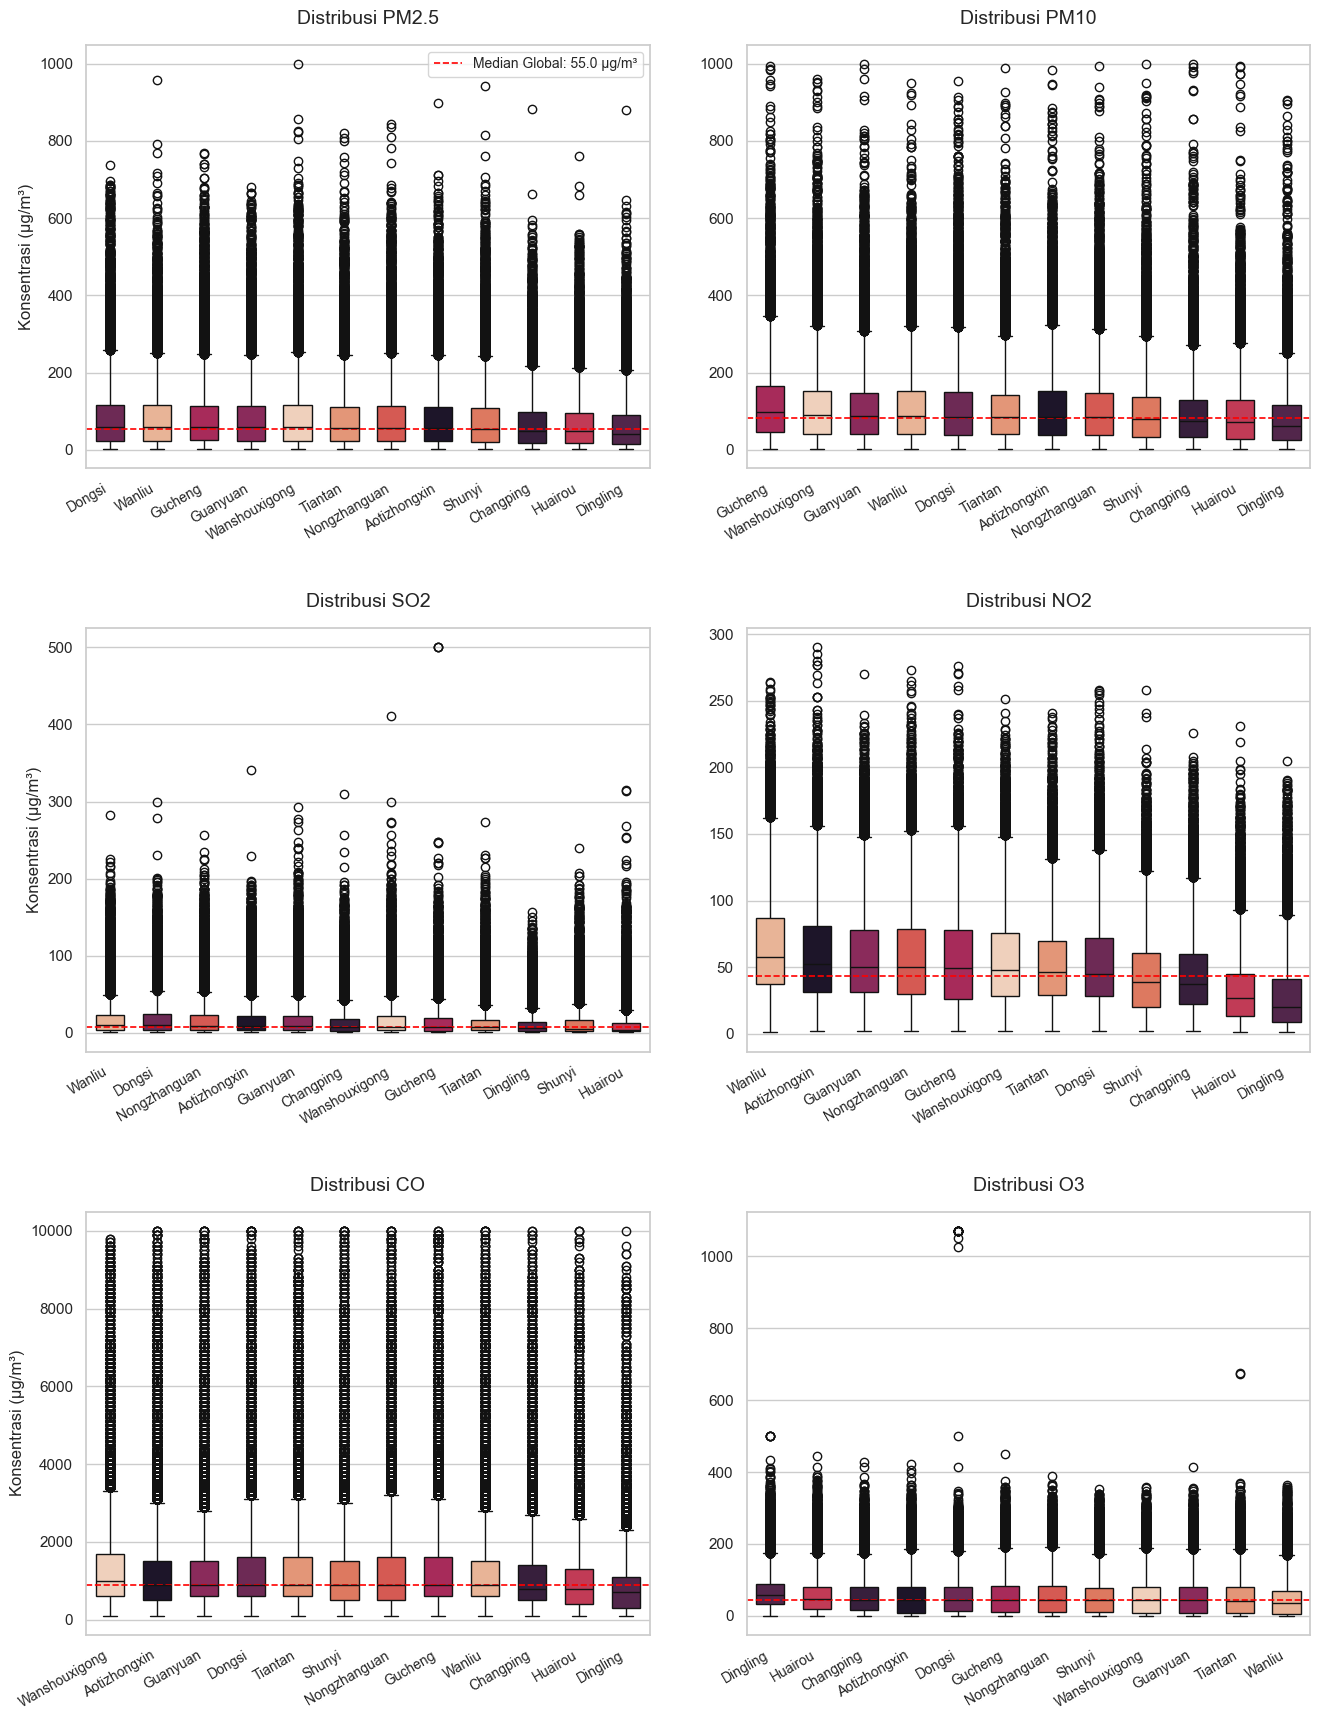

In [ ]:
# Visualisasi Semua Polutan di setiap titik pemantauan

plt.figure(figsize=(14, 18)) 
# List polutan
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Buat 3 baris x 2 kolom
for i, polutan in enumerate(pollutants, 1):
    plt.subplot(3, 2, i)  # (nrows=3, ncols=2, index=i)
    
    # Urutkan stasiun berdasarkan median polutan
    order = clean_df.groupby('station')[polutan].median().sort_values(ascending=False).index
    
    # Plot boxplot
    box = sns.boxplot(
        x='station',
        y=polutan,
        data=clean_df,
        order=order,
        palette="rocket",
        hue='station',
        legend=False,
        width=0.6
    )
    
    # Atur label dan title
    plt.title(f'Distribusi {polutan}', fontsize=14, pad=15)
    plt.xticks(rotation=30, ha='right', fontsize=10)
    plt.xlabel('')
    
    # Label y hanya di kolom kiri
    if i % 2 == 1:  # Subplot 1,3,5 (kolom kiri)
        plt.ylabel('Konsentrasi (µg/m³)', fontsize=12)
    else:
        plt.ylabel('')
    
    # Garis median global
    global_median = clean_df[polutan].median()
    plt.axhline(
        global_median, 
        color='red', 
        linestyle='--', 
        linewidth=1.2, 
        label=f'Median Global: {global_median:.1f} µg/m³'
    )
    
    # Legenda hanya di subplot pertama
    if i == 1:
        plt.legend(fontsize=10, loc='upper right')

plt.tight_layout(pad=3.0)
plt.show()

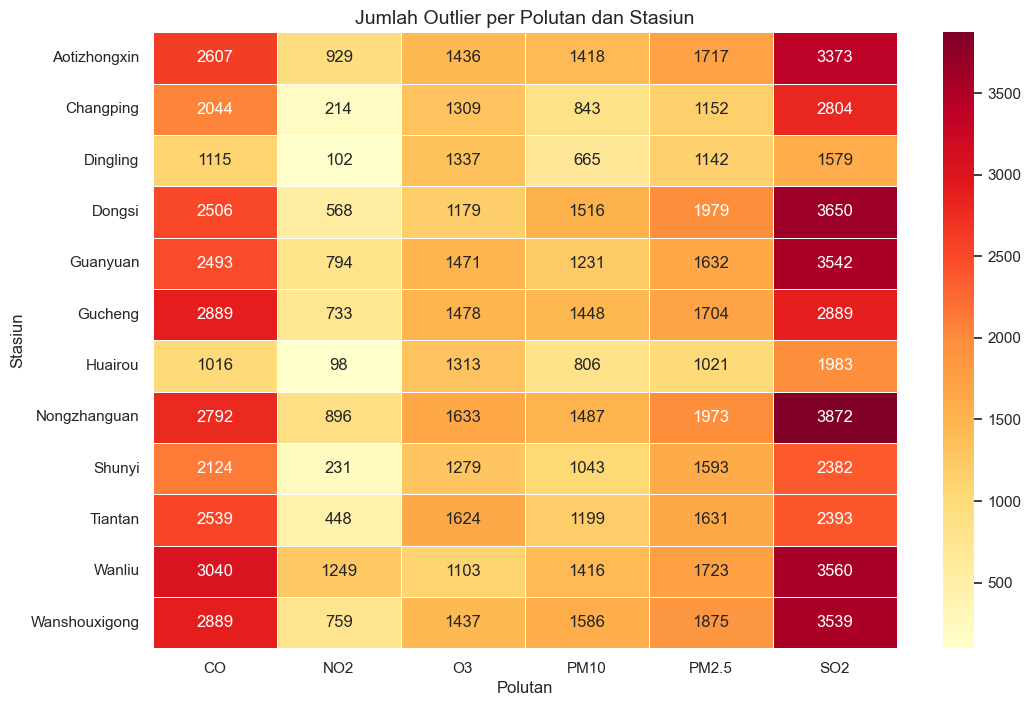

In [55]:
# Heatmap Outlier
pivot_outliers = outlier_df.pivot(index='Stasiun', columns='Polutan', values='Jumlah Outlier')
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_outliers, 
    annot=True, 
    cmap='YlOrRd', 
    fmt='d',
    linewidths=0.5
)
plt.title('Jumlah Outlier per Polutan dan Stasiun', fontsize=14)
plt.show()

**Insight:**
#### Pertanyaan 1. **Variasi Tingkat Kualitas Udara di 12 Titik Pemantauan**:

#Hotspot Polusi:

- Dengan melihat setiap grafik, kita bisa membandingkan konsentrasi polutan antar wilayah dan mengidentifikasi wilayah yang lebih tercemar atau lebih bersih.

- PM2.5: Grafik menunjukkan variasi konsentrasi PM2.5 di wilayah-wilayah seperti Daxing, Mentougou, Guanyuan, dll. Terdapat garis median global sebesar 55.0 µg/m³, yang memberikan patokan tentang tingkat polusi di wilayah-wilayah tersebut.

- PM10: Wilayah seperti Gucheng, Wanshouxigong, dan Guangyuan memiliki distribusi yang berbeda, menunjukkan bahwa beberapa wilayah mungkin lebih tercemar dibandingkan yang lain.

- SO2: Konsentrasi SO2 bervariasi di wilayah seperti Wanshouxigong, Daxing, dan Nongzhanguan, dengan beberapa wilayah memiliki nilai yang jauh lebih tinggi dibandingkan yang lain.

- NO2: NO2 menunjukkan variasi signifikan di wilayah seperti Wanshouxigong, Aotizhongxin, dan Guanyuan.

- CO: Konsentrasi CO lebih tinggi di beberapa wilayah seperti Wanshouxigong dan Aotizhongxin.

- O3: O3 menunjukkan variasi yang luas di wilayah seperti Dingling, Huairou, dan Changping.

# Heatmap Outlier

- Menunjukkan jumlah outlier (nilai ekstrem) untuk berbagai polutan udara di berbagai stasiun pemantauan

- Konsentrasi Outlier Polutan: 
 > SO2 di Nongzhanguan: Stasiun ini memiliki jumlah outlier tertinggi untuk SO2 (3872), menunjukkan masalah signifikan dengan polusi sulfur dioksida di lokasi ini.

 > PM2.5 di Aotizhongxin: Terdapat jumlah outlier tertinggi untuk PM2.5 (3373), menunjukkan masalah serius dengan partikel halus di lokasi ini.

 > NO2 di Wanliu: Stasiun ini memiliki jumlah outlier tertinggi untuk NO2 (1249), menunjukkan masalah polusi nitrogen dioksida yang signifikan.

- Stasiun dengan Masalah Polusi Terbesar:

 > Nongzhanguan, Dongsi, dan Wanliu: Ketiga stasiun ini memiliki jumlah outlier tertinggi di seluruh polutan, menunjukkan bahwa mereka memiliki masalah polusi yang paling signifikan secara keseluruhan.

- Kualitas Udara yang Lebih Baik:

 > Huairou: Stasiun ini secara konsisten menunjukkan jumlah outlier terendah untuk sebagian besar polutan, menunjukkan kualitas udara yang lebih baik dibandingkan stasiun lainnya.

### Pertanyaan 2:

Tren Bulanan

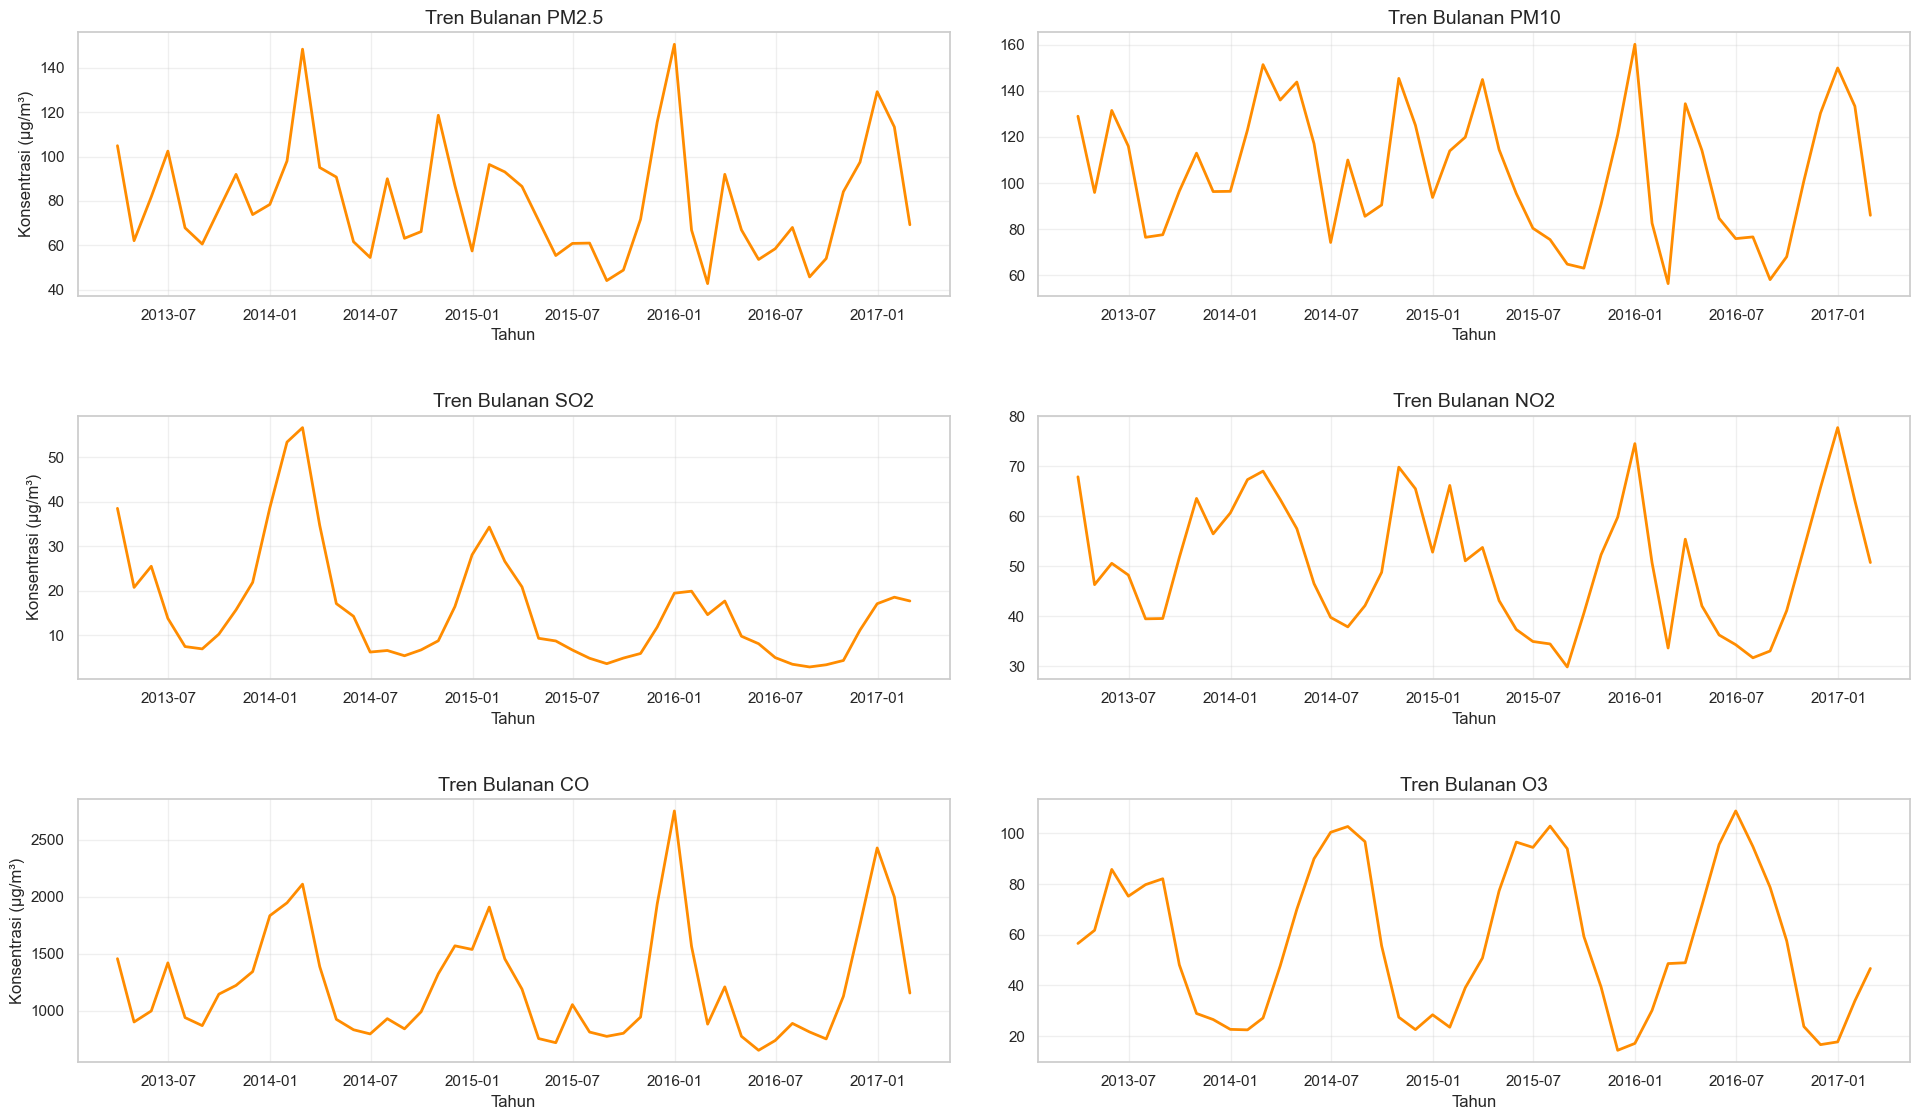

In [64]:
plt.figure(figsize=(20, 12))
for i, pol in enumerate(pollutants, 1):
    plt.subplot(3, 2, i)
    sns.lineplot(
        data=monthly_avg, 
        x=monthly_avg.index, 
        y=pol, 
        color='darkorange', 
        linewidth=2
    )
    plt.title(f'Tren Bulanan {pol}', fontsize=14)
    plt.xlabel('Tahun', fontsize=12)
    plt.ylabel('Konsentrasi (µg/m³)' if i % 2 == 1 else '')
    plt.grid(alpha=0.3)
plt.tight_layout(pad=3.0)
plt.show()

Distribusi Musiman (Boxplot per Bulan)

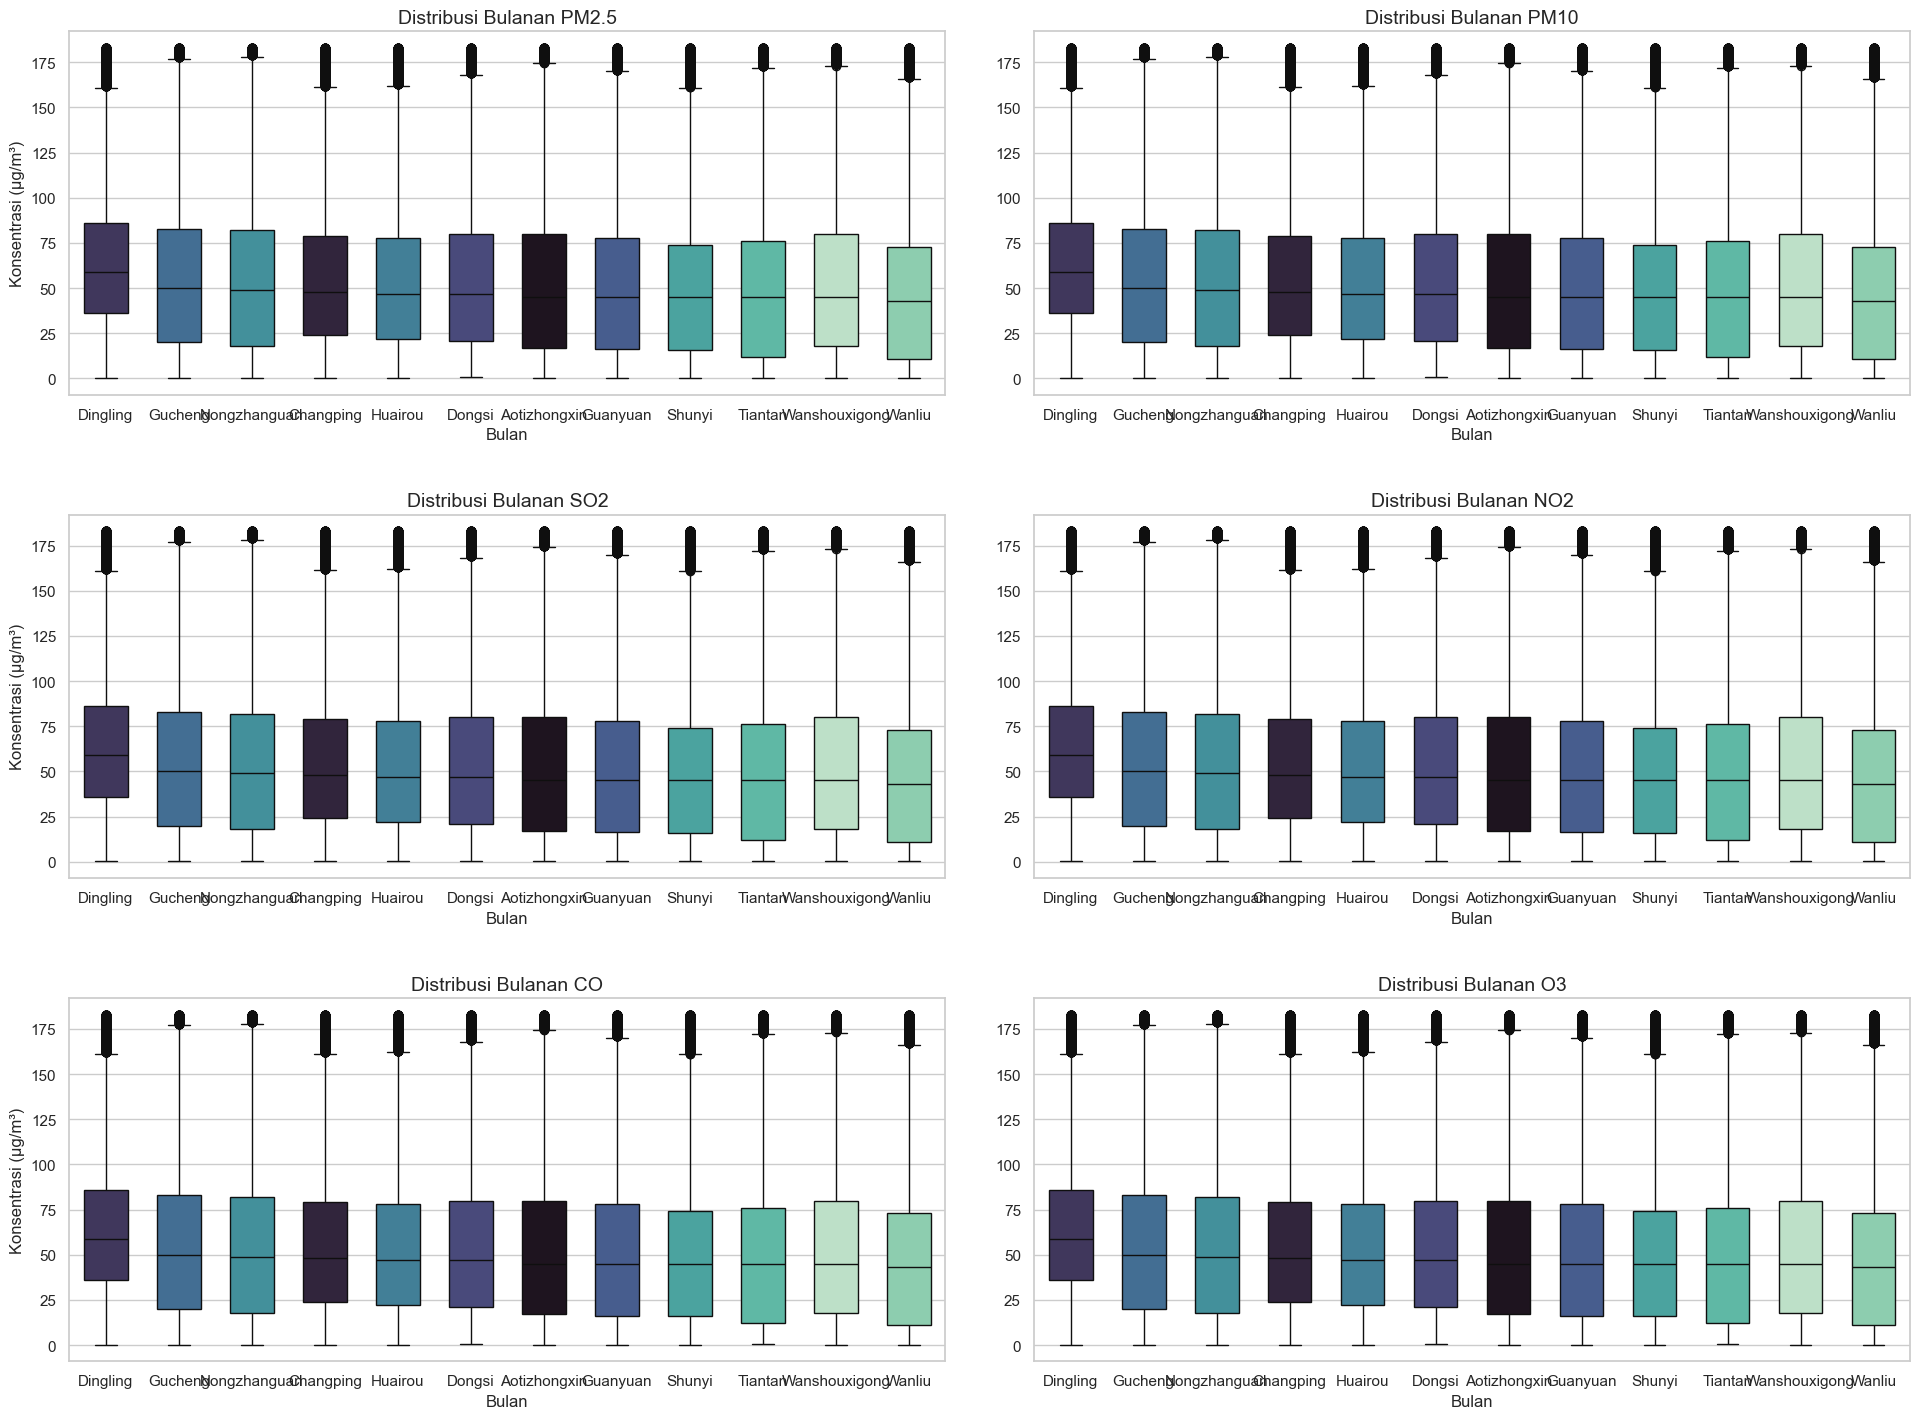

In [68]:
# Gabungkan semua dataframe dalam dfs menjadi satu dataframe
combined_df = pd.concat(dfs, ignore_index=True)

# Konversi kolom tanggal ke datetime
combined_df['date'] = pd.to_datetime(combined_df[['year', 'month', 'day', 'hour']])

plt.figure(figsize=(20, 15))
for i, pol in enumerate(pollutants, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(
    x='station',
    y=polutan,
    data=clean_df,
    order=order,
    palette="mako",
    hue='station',
    legend=False,
    width=0.6
)
    plt.title(f'Distribusi Bulanan {pol}', fontsize=14)
    plt.xlabel('Bulan', fontsize=12)
    plt.ylabel('Konsentrasi (µg/m³)' if i % 2 == 1 else '')
plt.tight_layout(pad=3.0)
plt.show()

Korelasi dengan Faktor Meteorologi

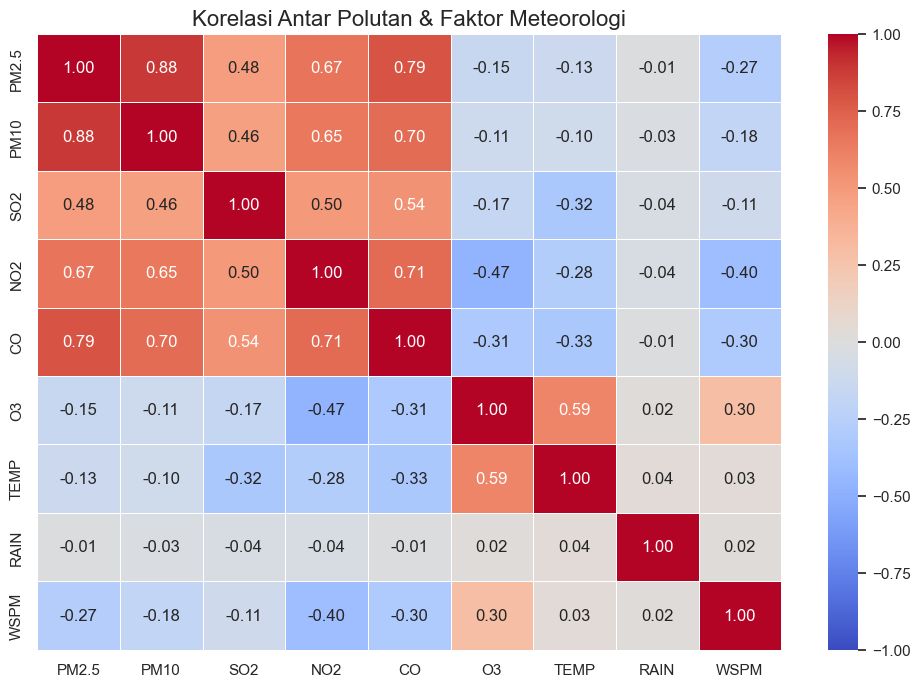

In [70]:
# Hitung korelasi
corr_matrix = combined_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'RAIN', 'WSPM']].corr()

# Visualisasi heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    vmin=-1,
    vmax=1,
    linewidths=0.5
)
plt.title('Korelasi Antar Polutan & Faktor Meteorologi', fontsize=16)
plt.show()

**Insight:**
#### Pertanyaan 2. **Tren Kualitas Udara dari Waktu ke Waktu**:
- Tren Bulanan:

 > Pola Musiman: Konsentrasi polutan udara menunjukkan pola musiman dengan puncak yang terjadi pada periode tertentu, kemungkinan terkait dengan perubahan cuaca, aktivitas industri, dan transportasi.

 > Periode Puncak Polusi: Awal 2014, pertengahan 2015, dan awal 2016 adalah periode dengan konsentrasi polutan yang tinggi untuk beberapa polutan utama seperti PM2.5, PM10, NO2, dan CO.

 > Pengaruh Faktor Eksternal: Fluktuasi konsentrasi polutan ini mungkin dipengaruhi oleh berbagai faktor eksternal seperti kebijakan pengendalian polusi, kondisi cuaca, dan aktivitas ekonomi.

- Distribusi Musiman (Boxplot per Bulan)

 > Variasi Antar Lokasi: Ada variasi signifikan dalam konsentrasi polutan udara di berbagai lokasi pemantauan. Lokasi seperti Aotizhongxin dan Wanshouxigong sering menunjukkan konsentrasi yang lebih tinggi untuk beberapa polutan.

 > Outlier Signifikan: Kehadiran outlier di beberapa lokasi menunjukkan adanya puncak polusi yang signifikan pada beberapa bulan tertentu, yang mungkin memerlukan investigasi lebih lanjut.

 > Kualitas Udara yang Relatif Lebih Baik: Lokasi seperti Huairou menunjukkan kualitas udara yang relatif lebih baik dengan konsentrasi polutan yang lebih rendah dan lebih konsisten.

- Korelasi dengan Faktor Meteorologi

 > Gambar heatmap menunjukkan korelasi antara berbagai polutan dan faktor meteorologi.

 > Hubungan Antara Polutan: Polutan udara utama seperti PM2.5, PM10, CO, dan NO2 cenderung meningkat atau menurun bersamaan, menunjukkan sumber emisi yang mirip.

 > Pengaruh Meteorologi: Suhu memiliki pengaruh signifikan terhadap konsentrasi ozon, sementara kecepatan angin dapat membantu mengurangi konsentrasi beberapa polutan.


## Conclusion

**Pertanyaan 1**
- Tingkat Polusi yang Berbeda-Beda: Kualitas udara bervariasi secara signifikan di antara 12 titik pemantauan, dengan beberapa stasiun menunjukkan tingkat polusi yang jauh lebih tinggi dibandingkan yang lain.

- Hotspot Polusi: Nongzhanguan, Aotizhongxin, dan Dongsi adalah beberapa stasiun yang secara konsisten menunjukkan masalah polusi yang signifikan, baik dalam hal distribusi polutan maupun jumlah outlier.

- Kualitas Udara yang Lebih Baik: Stasiun seperti Huairou menunjukkan kualitas udara yang lebih baik, dengan konsentrasi polutan yang lebih rendah dan sedikit outlier.

**Pertanyaan 2**
- Variasi Kualitas Udara: Kualitas udara bervariasi secara signifikan di antara berbagai titik pemantauan dengan beberapa lokasi menunjukkan konsentrasi polutan yang tinggi dan outlier signifikan.

- Tren Penurunan dan Stabilisasi: Kebanyakan polutan menunjukkan tren penurunan awal hingga pertengahan 2015, yang kemudian stabil dengan fluktuasi musiman.

- Hubungan dengan Faktor Meteorologi: Suhu dan kecepatan angin memiliki pengaruh signifikan terhadap konsentrasi polutan. Peningkatan suhu cenderung meningkatkan konsentrasi ozon, sementara angin membantu mendispersikan polutan.